In [155]:
# importing library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.lines as mlines
import plotly.express as px
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# load images for the screenshots of the GUI
image1 = Image.open('1.png')
image2 = Image.open('2.png')
image3 = Image.open('3.png')

total_width = image1.width + image2.width + image3.width
max_height = max(image1.height, image2.height, image3.height)

new_image = Image.new('RGB', (total_width, max_height), 'white')

x_offset = 0
for image in [image1, image2, image3]:
    new_image.paste(image, (x_offset, 0))
    x_offset += image.width

# save the combined image
new_image.save('combine.png')


In [ ]:
image1 = Image.open('1_s.png')
image2 = Image.open('2_s.png')
image3 = Image.open('3_s.png')

total_width = image1.width + image2.width + image3.width
max_height = max(image1.height, image2.height, image3.height)

new_image = Image.new('RGB', (total_width, max_height), 'white')

x_offset = 0
for image in [image1, image2, image3]:
    new_image.paste(image, (x_offset, 0))
    x_offset += image.width

# save the combined image
new_image.save('combine_2.png')

In [ ]:
# the image for the GUI stimulations

image1 = Image.open('combine.png')
image2 = Image.open('combine_2.png')

new_width = image1.width
new_height = int((new_width / image2.width) * image2.height)

image2_resized = image2.resize((new_width, new_height), Image.ANTIALIAS)

total_height = image1.height + image2_resized.height

new_image = Image.new('RGB', (new_width, total_height), 'white')

new_image.paste(image1, (0, 0))

new_image.paste(image2_resized, (0, image1.height))

# save the final combined image
new_image.save('final_combined.png')

In [146]:
# import the batch run data
df = pd.read_csv('batch_run_results_2.csv')
print(df.shape)
df.tail()

(301537, 19)


,Unnamed: 0,RunId,iteration,Step,initial_cooperate_prob,payoff_CC,payoff_CD,payoff_DC,payoff_DD,primary_ratio,primary_strategy,Frequency Dependent Agents,Success Base Agents,Random Copying Agents,Average Score(Frequency Dependent),Average Score(Success Base),Average Score(Random Copying),Defecting Agents,Cooperating Agents
301532,301532,58319,29,0,0.75,5,1,5,0,0.73,Random Copying,337,337,1826,0.000000,0.000000,0.000000,615,1885
301533,301533,58319,29,5,0.75,5,1,5,0,0.73,Random Copying,337,337,1826,184.498516,183.002967,183.849398,90,2410
301534,301534,58319,29,10,0.75,5,1,5,0,0.73,Random Copying,337,337,1826,382.234421,380.513353,380.681818,25,2475
301535,301535,58319,29,15,0.75,5,1,5,0,0.73,Random Copying,337,337,1826,581.234421,579.712166,579.008762,7,2493
301536,301536,58319,29,20,0.75,5,1,5,0,0.73,Random Copying,337,337,1826,781.163205,779.569733,778.576123,4,2496


In [147]:
total_combinations = len(df.groupby(['initial_cooperate_prob', 'payoff_CC', 'payoff_CD', 'payoff_DC', 'payoff_DD', 'primary_ratio', 'primary_strategy']))
total_combinations

1944

In [156]:
# define a function to categorize the payoffs
def categorize_payoff(row):
    if row['payoff_CC'] == row['payoff_CD'] == row['payoff_DC'] == row['payoff_DD']:
        return 'No Incentive'
    elif row['payoff_DC'] > row['payoff_CC'] > row['payoff_DD'] >= row['payoff_CD']:
        return 'Traditional Prisoner\'s Dilemma'
    elif row['payoff_CC'] > row['payoff_DC'] > row['payoff_DD'] >= row['payoff_CD']:
        return 'Stag Hunt'
    else:
        return 'Advanced Prisoner\'s Dilemma'

# apply the categorization function
df['Game_Type'] = df.apply(categorize_payoff, axis=1)
display(df)


,Unnamed: 0,RunId,iteration,Step,initial_cooperate_prob,payoff_CC,payoff_CD,payoff_DC,payoff_DD,primary_ratio,primary_strategy,Frequency Dependent Agents,Success Base Agents,Random Copying Agents,Average Score(Frequency Dependent),Average Score(Success Base),Average Score(Random Copying),Defecting Agents,Cooperating Agents,Game_Type
0,0,3,0,0,0.25,0,0,0,0,0.530000,Frequency Dependent Learning,1325,587,588,0.000000,0.000000,0.000000,1890,610,No Incentive
1,1,3,0,5,0.25,0,0,0,0,0.530000,Frequency Dependent Learning,1325,587,588,0.000000,0.000000,0.000000,2497,3,No Incentive
2,2,1,0,0,0.25,0,0,0,0,0.333333,Success Base Learning,833,833,834,0.000000,0.000000,0.000000,1869,631,No Incentive
3,3,1,0,5,0.25,0,0,0,0,0.333333,Success Base Learning,833,833,834,0.000000,0.000000,0.000000,2426,74,No Incentive
4,4,1,0,10,0.25,0,0,0,0,0.333333,Success Base Learning,833,833,834,0.000000,0.000000,0.000000,2483,17,No Incentive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301532,301532,58319,29,0,0.75,5,1,5,0,0.730000,Random Copying,337,337,1826,0.000000,0.000000,0.000000,615,1885,Advanced Prisoner's Dilemma
301533,301533,58319,29,5,0.75,5,1,5,0,0.730000,Random Copying,337,337,1826,184.498516,183.002967,183.849398,90,2410,Advanced Prisoner's Dilemma
301534,301534,58319,29,10,0.75,5,1,5,0,0.730000,Random Copying,337,337,1826,382.234421,380.513353,380.681818,25,2475,Advanced Prisoner's Dilemma
301535,301535,58319,29,15,0.75,5,1,5,0,0.730000,Random Copying,337,337,1826,581.234421,579.712166,579.008762,7,2493,Advanced Prisoner's Dilemma


In [157]:
# check for any rows that do not have a defined category
undefined_categories = df[df['Game_Type'].isnull()]

if not undefined_categories.empty:
    print("There are undefined categories in the following rows:")
    print(undefined_categories)
else:
    print("All payoff structures have been categorized.")

All payoff structures have been categorized.


In [158]:
# Average Score Calculation:

# At the end of each iteration of the simulation, the score for each agent is calculated based on the interactions it had with other agents according to the Prisoner's Dilemma payoff matrix.
# For each agent strategy (Frequency Dependent, Success Base, Random Copying), the score is the cumulative result of all games played by agents employing that strategy during the simulation step.
# The average score for a strategy at a specific step is the total score of all agents using that strategy divided by the number of agents employing that strategy.
# Mean Score Across Iterations:
# When analyzing results across multiple iterations or simulation runs, the average score for each strategy at the last step of each iteration is first calculated.
# These average scores are then aggregated over all iterations for a particular set of simulation parameters (like initial cooperation probability, payoff values, primary ratio, etc.).
# The mean of these aggregated average scores is then computed, providing a measure of how effective the strategy tends to be under specific conditions, averaged over several experimental runs.
# Standard Deviation of Scores:
# The standard deviation alongside the mean provides insights into the variability of scores for each strategy across different iterations.
# A lower standard deviation indicates that the scores are more consistent across different runs, suggesting a stable strategy performance under the given parameters.
# Conversely, a high standard deviation indicates more variability, suggesting the strategy's performance might be more sensitive to initial conditions or stochastic elements of the simulation.
# Overall Mean and Standard Deviation:
# After calculating the mean and standard deviation for each strategy across various parameter combinations, you can also compute the overall mean and standard deviation across all combinations.
# This "overall" metric provides a general sense of how each strategy performs on average across all tested scenarios, giving a broad view of strategy efficacy.


last_steps = df.groupby(['RunId', 'iteration']).agg({'Step': 'max'}).reset_index()

# merge this back to the original DataFrame to get the rows corresponding to the last steps of each iteration
last_steps = pd.merge(df, last_steps, how='inner', on=['RunId', 'iteration', 'Step'])

# group by all parameters and primary strategy, then calculate the mean and standard deviation of average scores
grouped = last_steps.groupby(['initial_cooperate_prob', 'payoff_CC', 'payoff_CD', 'payoff_DC', 'payoff_DD', 'primary_ratio', 'primary_strategy'])
mean_scores = grouped[['Average Score(Frequency Dependent)', 'Average Score(Success Base)', 'Average Score(Random Copying)']].mean()
std_scores = grouped[['Average Score(Frequency Dependent)', 'Average Score(Success Base)', 'Average Score(Random Copying)']].std()

# the overall mean and standard deviation across all combinations for each strategy
overall_mean = mean_scores.mean()
overall_std = mean_scores.std()

overall_mean, overall_std

(Average Score(Frequency Dependent)    226.802234
 Average Score(Success Base)           247.181916
 Average Score(Random Copying)         235.065645
 dtype: float64,
 Average Score(Frequency Dependent)    265.447074
 Average Score(Success Base)           277.791157
 Average Score(Random Copying)         269.670965
 dtype: float64)

In [159]:
# displaying the formatted table

grouped = last_steps.groupby(['initial_cooperate_prob', 'payoff_CC', 'payoff_CD', 'payoff_DC', 'payoff_DD', 'primary_ratio', 'primary_strategy', 'Game_Type']).agg({
    'Average Score(Frequency Dependent)': 'mean',
    'Average Score(Success Base)': 'mean',
    'Average Score(Random Copying)': 'mean',
    'Cooperating Agents': 'mean',
    'Defecting Agents': 'mean'
}).reset_index()

# calculate the total number of agents
total_agents = grouped['Cooperating Agents'] + grouped['Defecting Agents']
grouped['Proportion of Cooperating Agents'] = grouped['Cooperating Agents'] / total_agents

# calculate the overall mean and standard deviation across all combinations for each strategy
final_means = grouped[['Average Score(Frequency Dependent)', 'Average Score(Success Base)', 
                       'Average Score(Random Copying)', 'Proportion of Cooperating Agents']].mean()
final_stds = grouped[['Average Score(Frequency Dependent)', 'Average Score(Success Base)', 
                      'Average Score(Random Copying)', 'Proportion of Cooperating Agents']].std()

# format the final results
formatted_results = {
    'Statistic': ['Average Score (Frequency Dependent)', 'Average Score (Success Base)', 'Average Score (Random Copying)', 'Proportion of Cooperating Agents'],
    'Average(Std)': [
        f"{final_means['Average Score(Frequency Dependent)']:.2f} ({final_stds['Average Score(Frequency Dependent)']:.2f})",
        f"{final_means['Average Score(Success Base)']:.2f} ({final_stds['Average Score(Success Base)']:.2f})",
        f"{final_means['Average Score(Random Copying)']:.2f} ({final_stds['Average Score(Random Copying)']:.2f})",
        f"{final_means['Proportion of Cooperating Agents']:.4f} ({final_stds['Proportion of Cooperating Agents']:.4f})"
    ]
}

results_df = pd.DataFrame(formatted_results)
display(results_df)


,Statistic,Average(Std)
0,Average Score (Frequency Dependent),226.80 (265.45)
1,Average Score (Success Base),247.18 (277.79)
2,Average Score (Random Copying),235.07 (269.67)
3,Proportion of Cooperating Agents,0.7102 (0.4254)


In [160]:
# displaying the summary table with all categories

formatted_results = {
    'Average Score (Frequency Dependent)': f"{final_means['Average Score(Frequency Dependent)']:.2f} ({final_stds['Average Score(Frequency Dependent)']:.2f})",
    'Average Score (Success Base)': f"{final_means['Average Score(Success Base)']:.2f} ({final_stds['Average Score(Success Base)']:.2f})",
    'Average Score (Random Copying)': f"{final_means['Average Score(Random Copying)']:.2f} ({final_stds['Average Score(Random Copying)']:.2f})",
    'Proportion of Cooperating Agents': f"{final_means['Proportion of Cooperating Agents']:.2f} ({final_stds['Proportion of Cooperating Agents']:.2f})"
}


strategies = ['Frequency Dependent Learning', 'Success Base Learning', 'Random Copying']
primary_ratios = [1/3, 0.53, 0.73]
initial_cooperate_probs = [0.25, 0.5, 0.75]
game_types = ['No Incentive', 'Traditional Prisoner\'s Dilemma', 'Advanced Prisoner\'s Dilemma', 'Stag Hunt']


data = {}
cooperators_data = {}

# helper functions to calculate the mean score for each strategy and the proportion of cooperators
def calculate_mean_and_coop(strategy, condition_filter):
    column_name = {
        'Frequency Dependent Learning': 'Average Score(Frequency Dependent)',
        'Success Base Learning': 'Average Score(Success Base)',
        'Random Copying': 'Average Score(Random Copying)'
    }[strategy]
    
    filtered_data = grouped[(grouped['primary_strategy'] == strategy) & condition_filter]
    mean_score = round(filtered_data[column_name].mean(), 2)
    return mean_score

def calculate_cooperators(condition_filter):
    total_cooperators = grouped[condition_filter]['Cooperating Agents'].sum()
    total_agents = total_cooperators + grouped[condition_filter]['Defecting Agents'].sum()
    return round(total_cooperators / total_agents, 2) if total_agents > 0 else 0


for ratio in primary_ratios:
    data[f"Primary Ratio {ratio}"] = [calculate_mean_and_coop(strategy, grouped['primary_ratio'] == ratio) for strategy in strategies]
    cooperators_data[f"Primary Ratio {ratio}"] = calculate_cooperators(grouped['primary_ratio'] == ratio)

for prob in initial_cooperate_probs:
    data[f"Initial Cooperate Probability {prob}"] = [calculate_mean_and_coop(strategy, grouped['initial_cooperate_prob'] == prob) for strategy in strategies]
    cooperators_data[f"Initial Cooperate Probability {prob}"] = calculate_cooperators(grouped['initial_cooperate_prob'] == prob)

game_types = ['No Incentive', 'Traditional Prisoner\'s Dilemma', 'Advanced Prisoner\'s Dilemma', 'Stag Hunt']
for game_type in game_types:
    data[f"Game Type: {game_type}"] = [calculate_mean_and_coop(strategy, grouped['Game_Type'] == game_type) for strategy in strategies]
    cooperators_data[f"Game Type: {game_type}"] = calculate_cooperators(grouped['Game_Type'] == game_type)


data['Overall Average (Std)'] = [formatted_results['Average Score (Frequency Dependent)'],
                                formatted_results['Average Score (Success Base)'],
                                formatted_results['Average Score (Random Copying)']]
cooperators_data['Overall Average (Std)'] = formatted_results['Proportion of Cooperating Agents']


results_df = pd.DataFrame(data, index=[f'Avg Score ({strategy})' for strategy in strategies]).transpose()
results_df['Proportion of Cooperators'] = pd.Series(cooperators_data)
results_df = pd.concat([results_df.loc[['Overall Average (Std)']], results_df.drop('Overall Average (Std)')])


display(results_df)

,Avg Score (Frequency Dependent Learning),Avg Score (Success Base Learning),Avg Score (Random Copying),Proportion of Cooperators
Overall Average (Std),226.80 (265.45),247.18 (277.79),235.07 (269.67),0.71 (0.43)
Primary Ratio 0.3333333333333333,191.45,208.3,199.83,0.73
Primary Ratio 0.53,243.62,161.38,286.76,0.73
Primary Ratio 0.73,199.87,151.04,452.34,0.67
Initial Cooperate Probability 0.25,221.08,189.71,358.53,0.63
Initial Cooperate Probability 0.5,273.91,174.51,317.11,0.74
Initial Cooperate Probability 0.75,139.96,156.51,263.29,0.76
Game Type: No Incentive,0.0,0.0,0.0,0.5
Game Type: Traditional Prisoner's Dilemma,278.24,364.38,350.2,0.47
Game Type: Advanced Prisoner's Dilemma,189.7,144.88,290.01,0.71


In [103]:
# handling missing data for simulation steps when the simulations finish before the step of 50

df_2 = df
df_2['Proportion of Cooperators'] = (df_2['Cooperating Agents'] / total_agents) * 100


def fill_missing_steps(group):
    max_step = 50
    last_observed = group['Step'].max()
    if last_observed < max_step:
        fill_steps = pd.DataFrame({
            'Step': range(last_observed + 1, max_step + 1),
            'Proportion of Cooperators': group['Proportion of Cooperators'].iloc[-1]
        })
        for col in group.columns:
            if col not in ['Step', 'Proportion of Cooperators']:
                fill_steps[col] = group[col].iloc[0] if group[col].dtype != 'object' else group[col].mode()[0]
        return pd.concat([group, fill_steps], ignore_index=True)
    return group


filled_line_df = df_2.groupby(['initial_cooperate_prob', 'payoff_CC', 'payoff_CD', 'payoff_DC', 
                               'payoff_DD', 'primary_strategy', 'primary_ratio']).apply(fill_missing_steps).reset_index(drop=True)


print(filled_line_df.shape)

(345944, 21)


/var/folders/yy/wn0z53b977q818d7g3560t400000gn/T/ipykernel_6910/355890002.py:21: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/yy/wn0z53b977q818d7g3560t400000gn/T/ipykernel_6910/355890002.py:21: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/yy/wn0z53b977q818d7g3560t400000gn/T/ipykernel_6910/355890002.py:21: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/yy/wn0z53b977q818d7g3560t400000gn/T/ipykernel_6910/355890002.py:21: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/yy/wn0z53b977q818d7g3560t400000gn/T/ipykernel_6910/355890002.py:21: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/yy/wn0z53b977q818d7g3560t400000gn/T/ipykernel_6910/355890002.py:21: FutureWarning:



The `ci` parameter is

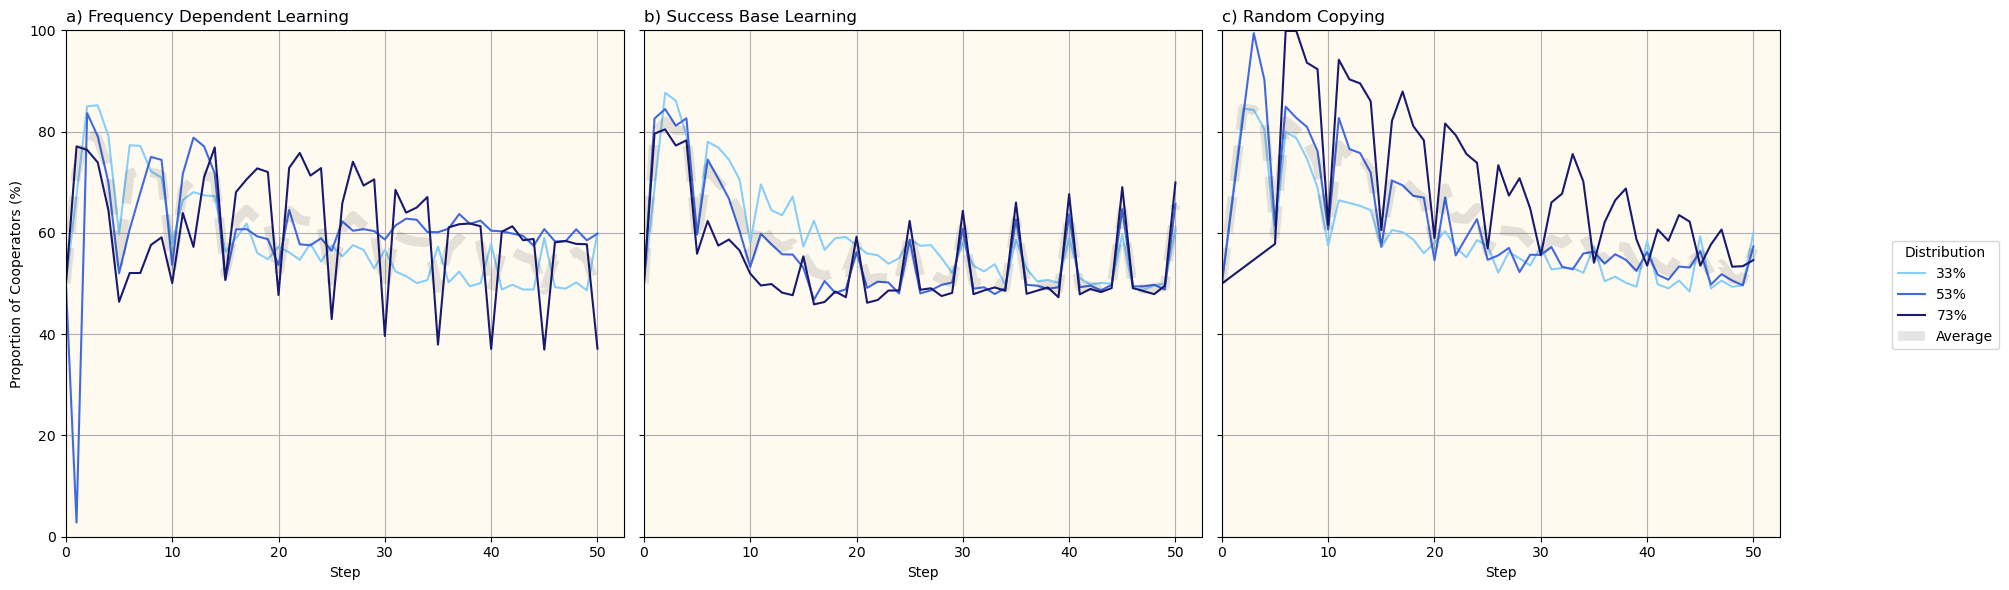

In [163]:
# creating the lineplot for the proportion of the cooperators with all possible combinations
df_line = filled_line_df 

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

strategies = ['Frequency Dependent Learning', 'Success Base Learning', 'Random Copying']
subplot_labels = ['a) Frequency Dependent Learning', 'b) Success Base Learning', 'c) Random Copying']
colors = ['lightskyblue', 'royalblue', 'midnightblue']

legend_handles = []

# loop through each strategy
for i, strategy in enumerate(strategies):
    for ratio, color in zip([1/3, 0.53, 0.73], colors):
        ratio_data = df_line[
            (df_line['primary_strategy'] == strategy) &
            (df_line['primary_ratio'] == ratio)
        ].groupby('Step').agg({'Cooperating Agents': 'sum', 'primary_ratio': 'count'}).reset_index()
        ratio_data['Proportion of Cooperators'] = (ratio_data['Cooperating Agents'] / (total_agents * ratio_data['primary_ratio'])) * 100

        # plot the individual lines for each ratio, disable the legend for individual plots
        sns.lineplot(ax=axes[i], data=ratio_data, x='Step', y='Proportion of Cooperators', color=color, label=f'{int(ratio*100)}%', ci=None, legend=None)

    # calculate the overall average across all ratios for each strategy
    overall_avg_data = df_line[df_line['primary_strategy'] == strategy].groupby('Step')['Cooperating Agents'].mean().reset_index()
    overall_avg_data['Proportion of Cooperators'] = (overall_avg_data['Cooperating Agents'] / total_agents) * 100

    # plot the overall average line, disable the legend for individual plots
    sns.lineplot(ax=axes[i], data=overall_avg_data, x='Step', y='Proportion of Cooperators', color='black', linewidth=7, linestyle='--', alpha=0.1, label='Average', legend=None)

    # set the subplot title
    axes[i].set_title(subplot_labels[i], loc='left')

    # set the background color for the subplot area
    axes[i].set_facecolor('floralwhite')


axes[0].set_ylabel('Proportion of Cooperators (%)')
for ax in axes:
    ax.set_xlabel('Step')
    ax.set_xlim(left=0)
    ax.set_ylim([0, 100])
    ax.grid(True)

# create a single legend for all subplots, placed outside on the right
for color, label in zip(colors, ['33%', '53%', '73%']):
    legend_handles.append(plt.Line2D([0], [0], color=color, label=label))
legend_handles.append(mlines.Line2D([], [], color='black', linestyle='--', linewidth=7, alpha=0.1, label='Average'))
fig.legend(handles=legend_handles, title='Distribution', loc='center left', bbox_to_anchor=(1.05, 0.5))

plt.tight_layout()
plt.show()


/var/folders/yy/wn0z53b977q818d7g3560t400000gn/T/ipykernel_6910/2176557629.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yy/wn0z53b977q818d7g3560t400000gn/T/ipykernel_6910/2176557629.py:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/yy/wn0z53b977q818d7g3560t400000gn/T/ipykernel_6910/2176557629.py:36: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


/var/folders/yy/wn0z53b977q818d7g3560t400000gn/T/ipykernel_6910/2176557629.py:3

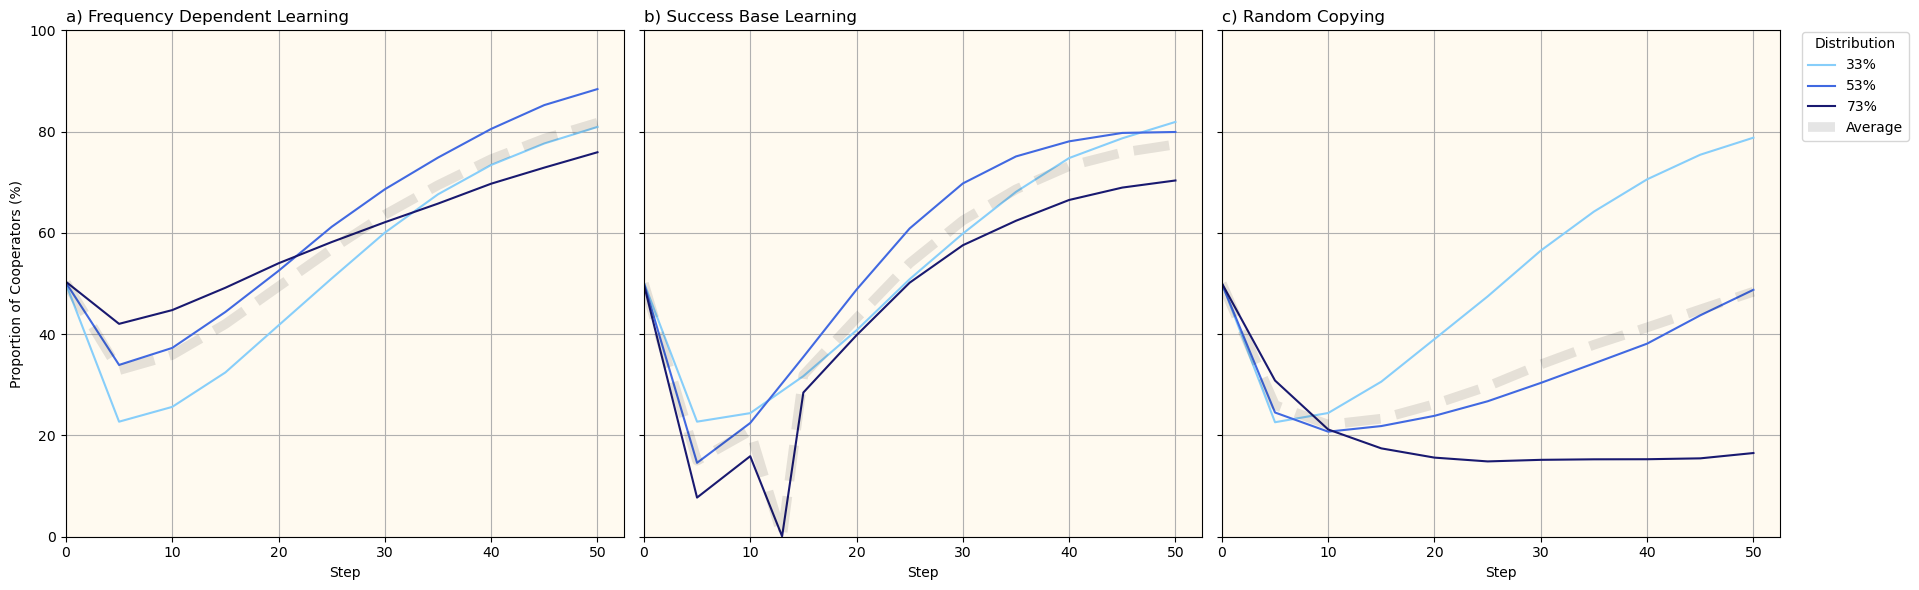

In [169]:
# creating the lineplot for the proportion of the cooperators with a narrower condition


fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)


strategies = ['Frequency Dependent Learning', 'Success Base Learning', 'Random Copying']
subplot_labels = ['a) Frequency Dependent Learning', 'b) Success Base Learning', 'c) Random Copying']
colors = ['lightskyblue', 'royalblue', 'midnightblue']  
total_agents = 2500 


legend_handles = []
legend_labels = ['33%', '53%', '73%', 'Average']

# loop through each strategy
for i, strategy in enumerate(strategies):
    # filter data for the current strategy
    strategy_data = df_line[
        (df_line['payoff_CC'] == 1) &
        (df_line['payoff_CD'] == 0) &
        (df_line['payoff_DC'] == 2) &
        (df_line['payoff_DD'] == 0) &
        (df_line['initial_cooperate_prob'] == 0.5) &
        (df_line['primary_strategy'] == strategy)
    ]

    # map ratios to labels
    ratios = [1/3, 0.53, 0.73]
    ratio_labels = {1/3: '33%', 0.53: '53%', 0.73: '73%'}
    strategy_data['ratio_label'] = strategy_data['primary_ratio'].map(ratio_labels)

    # calculate the proportion of cooperators
    strategy_data['Proportion of Cooperators'] = (strategy_data['Cooperating Agents'] / total_agents) * 100

    sns.lineplot(ax=axes[i], data=strategy_data, x='Step', y='Proportion of Cooperators', hue='ratio_label', palette=colors, ci=None, legend=False)
    average_data = strategy_data.groupby('Step')['Proportion of Cooperators']. mean().reset_index()
    sns.lineplot(ax=axes[i], data=average_data, x='Step', y='Proportion of Cooperators', color='black', linewidth=7, ci=None, legend=False)

    avg_line = axes[i].lines[-1]  
    avg_line.set_linestyle('--') 
    avg_line.set_alpha(0.1) 

    axes[i].set_title(subplot_labels[i], loc='left')
    axes[i].set_facecolor('floralwhite')  


for color, label in zip(colors, ['33%', '53%', '73%']):
    legend_handles.append(plt.Line2D([0], [0], color=color, label=label))

legend_handles.append(mlines.Line2D([], [], color='black', linestyle='--', linewidth=7, alpha=0.1, label='Average'))


axes[0].set_ylabel('Proportion of Cooperators (%)')
for ax in axes:
    ax.set_xlabel('Step')
    ax.set_xlim(left=0)
    ax.set_ylim([0, 100])
    ax.grid(True)

fig.legend(handles=legend_handles, title='Distribution', loc='upper left', bbox_to_anchor=(1, 0.95))

plt.tight_layout()
plt.show()


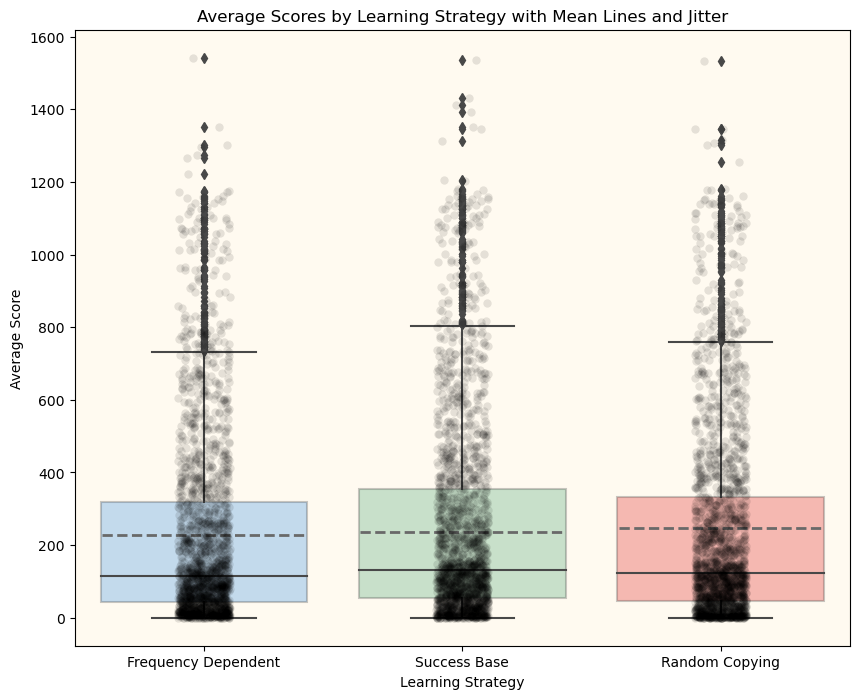

In [170]:
# creating a boxplot to visualize the average scores

# reshape the data
melted_data = pd.melt(mean_scores.reset_index(), id_vars=['initial_cooperate_prob', 'payoff_CC', 'payoff_CD', 'payoff_DC', 'payoff_DD', 'primary_ratio', 'primary_strategy'],
                      value_vars=['Average Score(Frequency Dependent)', 'Average Score(Success Base)', 'Average Score(Random Copying)'],
                      var_name='Strategy', value_name='Average Score')


melted_data['Strategy'] = melted_data['Strategy'].replace({
    'Average Score(Frequency Dependent)': 'Frequency Dependent',
    'Average Score(Success Base)': 'Success Base',
    'Average Score(Random Copying)': 'Random Copying'
})

# a color palette for each strategy
color_palette = {
    'Frequency Dependent': 'dodgerblue',
    'Success Base': 'mediumseagreen',
    'Random Copying': 'red'
}


plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=melted_data, x='Strategy', y='Average Score', palette=color_palette, boxprops=dict(alpha=.3))
sns.stripplot(data=melted_data, x='Strategy', y='Average Score', color='black', size= 6, jitter=True, alpha=0.1)


means = melted_data.groupby('Strategy')['Average Score'].mean()
for i, strategy in enumerate(means.index):
    plt.axhline(y=means[strategy], color='dimgrey', linestyle='--', xmin=0.035 + i/3, xmax=0.3 + i/3, linewidth=2)

plt.title('Average Scores by Learning Strategy with Mean Lines and Jitter')
plt.xlabel('Learning Strategy')
plt.ylabel('Average Score')


ax.set_facecolor('floralwhite')
plt.gca().set_facecolor('floralwhite')

plt.show()

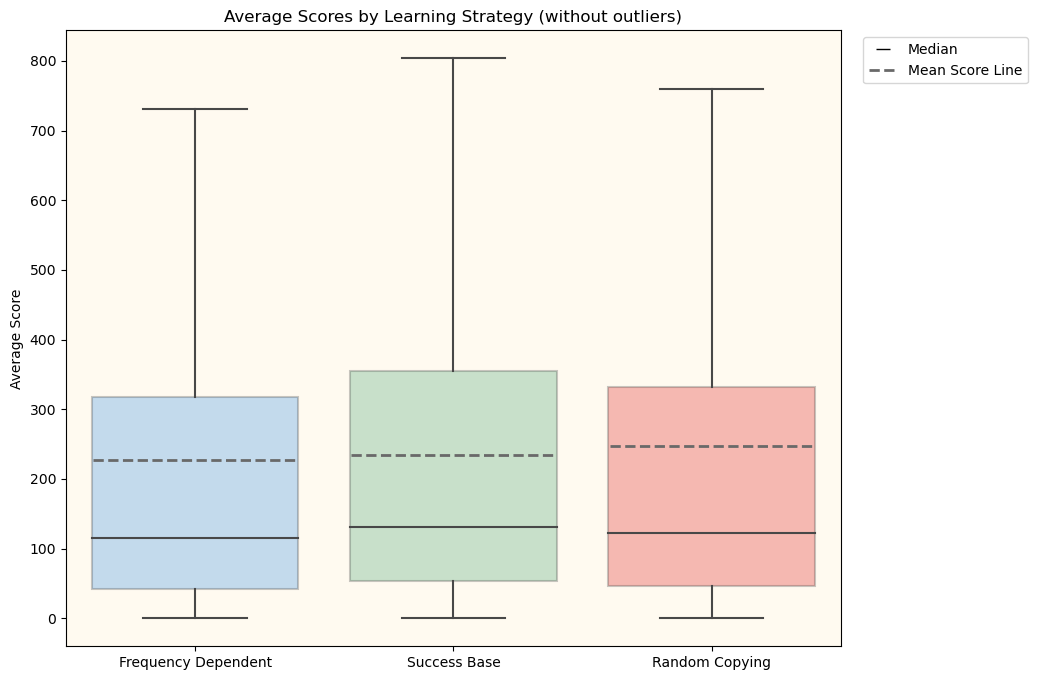

In [171]:
# remove the outliers for the plot

Q1 = melted_data.groupby('Strategy')['Average Score'].quantile(0.25)
Q3 = melted_data.groupby('Strategy')['Average Score'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


melted_data['lower_bound'] = melted_data['Strategy'].map(lower_bound)
melted_data['upper_bound'] = melted_data['Strategy'].map(upper_bound)


plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=melted_data, x='Strategy', y='Average Score', palette=color_palette, boxprops=dict(alpha=.3), showfliers=False)


means = melted_data.groupby('Strategy')['Average Score'].mean()
for i, strategy in enumerate(means.index):
    plt.axhline(y=means[strategy], color='dimgrey', linestyle='--', xmin=0.035 + i/3, xmax=0.3 + i/3, linewidth=2)

mean_line = mlines.Line2D([], [], color='dimgrey', linestyle='--', linewidth=2, label='Mean Score Line')
median_line = mlines.Line2D([], [], color='white', marker='_', linestyle='', markersize=10, label='Median', markeredgecolor='black')


plt.legend(handles=[median_line, mean_line], loc='upper right',bbox_to_anchor=(1.25, 1))

plt.title('Average Scores by Learning Strategy (without outliers)')
plt.xlabel('')
plt.ylabel('Average Score')

ax.set_facecolor('floralwhite')
plt.gca().set_facecolor('floralwhite')

plt.show()

In [172]:
# creating a 3D plot to explore the average scores for intital cooperator probabilities and the primary strategy ratio

initial_cooperate_prob_range = np.arange(0.25, 0.76, 0.25)
primary_strategy_range = np.array([1/3, 0.53, 0.73])

filtered_df_po = df[(df['payoff_CC'] == 1) & (df['payoff_CD'] == 0) & (df['payoff_DC'] == 2) & (df['payoff_DD'] == 0)]
last_steps_po = filtered_df_po.groupby(['RunId', 'iteration']).agg({'Step': 'max'}).reset_index()
last_steps_po = pd.merge(filtered_df_po, last_steps_po, how='inner', on=['RunId', 'iteration', 'Step'])
grouped_po = last_steps_po.groupby(['initial_cooperate_prob', 'primary_ratio', 'primary_strategy']).mean().reset_index()


fig = px.scatter_3d(grouped_po, x='initial_cooperate_prob', y='primary_ratio', z='Average Score(Frequency Dependent)',
                     color='primary_strategy', symbol='primary_strategy', opacity=0.7,
                     labels={
                         "initial_cooperate_prob": "Initial Cooperation Probability",
                         "primary_ratio": "Primary Ratio",
                         "Average Score(Frequency Dependent)": "Average Score (Frequency Dependent)"
                     },
                     title="3D Plot of Learning Strategies: Frequency Dependent")
fig.update_layout(legend_title_text='Strategy')
fig.show()

/var/folders/yy/wn0z53b977q818d7g3560t400000gn/T/ipykernel_6910/3425942645.py:9: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [174]:
# creating a bubble plot to explore the average scores for intital cooperator probabilities and the primary strategy ratio


grouped_po['initial_cooperate_prob'] = grouped_po['initial_cooperate_prob'].astype(float)
grouped_po['primary_ratio'] = grouped_po['primary_ratio'].astype(float)


grouped_po['initial_cooperate_prob'] = pd.cut(grouped_po['initial_cooperate_prob'], 
                                              bins=np.concatenate(([0], initial_cooperate_prob_range + 0.125)), 
                                              labels=initial_cooperate_prob_range, include_lowest=True)
grouped_po['primary_ratio'] = pd.cut(grouped_po['primary_ratio'], 
                                     bins=np.concatenate(([0], primary_strategy_range + 0.1)), 
                                     labels=primary_strategy_range, include_lowest=True)

grouped_po['initial_cooperate_prob'] = grouped_po['initial_cooperate_prob'].astype(str)
grouped_po['primary_ratio'] = grouped_po['primary_ratio'].astype(str)

# calculate max score for normalization
max_score = grouped_po['Average Score(Frequency Dependent)'].max()

# create the bubble plot for each strategy
fig = px.scatter(grouped_po, x='initial_cooperate_prob', y='primary_ratio', 
                 size='Average Score(Frequency Dependent)', 
                 color='primary_strategy', 
                 facet_col='primary_strategy',
                 size_max=50,  
                 labels={
                     "initial_cooperate_prob": "Initial Cooperation Probability",
                     "primary_ratio": "Primary Ratio",
                     "Average Score(Frequency Dependent)": "Average Score"
                 },
                 title="2D Bubble Plot of Learning Strategies")

# Update layout for better readability
fig.update_layout(legend_title_text='Strategy', xaxis_title="Initial Cooperation Probability",
                  yaxis_title="Primary Ratio")
fig.update_xaxes(type='category')
fig.update_yaxes(type='category')

fig.show()

In [176]:
# change the background color and the bubble colors

grouped_po['initial_cooperate_prob'] = pd.to_numeric(grouped_po['initial_cooperate_prob'], errors='coerce')
grouped_po['primary_ratio'] = pd.to_numeric(grouped_po['primary_ratio'], errors='coerce')

color_palette = {
    'Frequency Dependent Learning': 'dodgerblue',
    'Success Base Learning': 'mediumseagreen',
    'Random Copying': 'red'
}

initial_cooperate_prob_range = np.array([0.25, 0.5, 0.75])  
primary_strategy_range = np.array([1/3, 0.53, 0.73])      

# create bins and labels
bins_icp = np.concatenate(([0], initial_cooperate_prob_range + 0.125))
labels_icp = ['25%', '50%', '75%']

bins_pr = np.concatenate(([0], primary_strategy_range + 0.1))
labels_pr = ['33%', '53%', '73%']

# categorization using pd.cut
grouped_po['initial_cooperate_prob_cat'] = pd.cut(grouped_po['initial_cooperate_prob'], bins=bins_icp, labels=labels_icp, include_lowest=True)
grouped_po['primary_ratio_cat'] = pd.cut(grouped_po['primary_ratio'], bins=bins_pr, labels=labels_pr, include_lowest=True)

fig = px.scatter(grouped_po, x='initial_cooperate_prob_cat', y='primary_ratio_cat', 
                 size='Average Score(Frequency Dependent)', 
                 color='primary_strategy', 
                 facet_col='primary_strategy',
                 category_orders={"primary_strategy": ["Frequency Dependent Learning", "Success Base Learning", "Random Copying"]},
                 color_discrete_map=color_palette,
                 size_max=60, labels={
                     "initial_cooperate_prob_cat": "Initial Cooperation Probability",
                     "primary_ratio_cat": "Primary Strategy Distribution",
                     "Average Score(Frequency Dependent)": "Average Score"
                 } )


fig.update_layout(
    plot_bgcolor='floralwhite', 
    legend_title_text='Strategy',
    xaxis_title="",
    yaxis_title="Primary Strategy Distribution",
    legend=dict(itemsizing='constant')
)


fig.layout.legend = None

# add subplot titles
subplot_titles = ['a) Frequency Dependent Learning', 'b) Success Base Learning', 'c) Random Copying']
for i, subplot_title in enumerate(subplot_titles, 1):
    fig.layout.annotations[i-1].text = subplot_title


fig.update_xaxes(type='category', title="")
fig.show()


In [178]:
# another bubble plot for better format

fig = px.scatter(grouped_po, x='initial_cooperate_prob_cat', y='primary_ratio_cat', 
                 size='Average Score(Frequency Dependent)', 
                 color='primary_strategy', 
                 facet_col='primary_strategy',
                 category_orders={"primary_strategy": ["Frequency Dependent Learning", "Success Base Learning", "Random Copying"]},
                 color_discrete_map=color_palette,
                 size_max=60, labels={
                     "initial_cooperate_prob_cat": "Initial Cooperation Probability",
                     "primary_ratio_cat": "Primary Strategy Distribution",
                     "Average Score(Frequency Dependent)": "Average Score"
                 })


fig.update_layout(
    plot_bgcolor='floralwhite', 
    legend_title_text='Strategy',
    yaxis_title="Primary Strategy Distribution",
    legend=dict(itemsizing='constant'),
    showlegend = False
)

fig.layout.legend = None


subplot_titles = ['a) Frequency Dependent Learning', 'b) Success Base Learning', 'c) Random Copying']
for i, subplot_title in enumerate(subplot_titles, 1):
    fig.layout.annotations[i-1].text = subplot_title


fig.update_xaxes(title=None, type='category')


fig.add_annotation(
    text="Initial Cooperation Probability",  
    xref="paper", yref="paper",
    x=0.5, y=-0.2, 
    showarrow=False, 
    font=dict(size=12, color="black"), 
    align="center"
)

fig.show()

In [181]:
# regression model 

# prepare data for regression
last_steps['primary_ratio'] = last_steps['primary_ratio'].astype('category')
last_steps['initial_cooperate_prob'] = last_steps['initial_cooperate_prob'].astype('category')
last_steps['Game_Type'] = last_steps['Game_Type'].astype('category')

last_steps['total_agents'] = last_steps['Cooperating Agents'] + last_steps['Defecting Agents']
last_steps['Proportion of Cooperating Agents'] = last_steps['Cooperating Agents'] / last_steps['total_agents']

# separate regression models for each dependent variable
dependent_vars = ['Average Score(Frequency Dependent)', 'Average Score(Success Base)', 'Average Score(Random Copying)', 'Proportion of Cooperating Agents']
results = {}
for var in dependent_vars:
    formula = f"Q('{var}') ~ C(primary_ratio) + C(initial_cooperate_prob) + C(Game_Type)"
    model = smf.ols(formula, data=last_steps).fit()
    results[var] = model.summary()

for result in results:
    print(f"Results for {result}:\n{results[result]}\n\n")
print(model.summary())


Results for Average Score(Frequency Dependent):
                                       OLS Regression Results                                      
Dep. Variable:     Q('Average Score(Frequency Dependent)')   R-squared:                       0.057
Model:                                                 OLS   Adj. R-squared:                  0.057
Method:                                      Least Squares   F-statistic:                     505.4
Date:                                     Mon, 06 May 2024   Prob (F-statistic):               0.00
Time:                                             01:04:52   Log-Likelihood:            -4.1086e+05
No. Observations:                                    58320   AIC:                         8.217e+05
Df Residuals:                                        58312   BIC:                         8.218e+05
Df Model:                                                7                                         
Covariance Type:                                 non

In [182]:
# creating the table for the results from the model

models = {}
for var in dependent_vars:
    formula = f"Q('{var}') ~ C(primary_ratio) + C(initial_cooperate_prob) + C(Game_Type)"
    models[var] = smf.ols(formula, data=last_steps).fit()

# initialize dataFrame 
predictors = [
    'Intercept', 
    'C(primary_ratio)[T.0.53]', 
    'C(primary_ratio)[T.0.73]', 
    'C(initial_cooperate_prob)[T.0.5]', 
    'C(initial_cooperate_prob)[T.0.75]', 
    'C(Game_Type)[T.No Incentive]', 
    'C(Game_Type)[T.Stag Hunt]', 
    'C(Game_Type)[T.Traditional Prisoner\'s Dilemma]'
]
columns = [
    'Average Score(Frequency Dependent)', 
    'Average Score(Success Base)', 
    'Average Score(Random Copying)', 
    'Proportion of Cooperating Agents'
]

# create empty DataFrame
summary_df = pd.DataFrame(index=predictors, columns=columns)

# fill the DataFrame 
for var in columns:
    model = models[var]
    params = model.params
    conf_lower = model.conf_int()[0]
    conf_upper = model.conf_int()[1]
    pvalues = model.pvalues

    for pred in predictors:
        pred_key = 'Intercept' if pred == 'Intercept' else f"{pred}"  
        if pred_key in params.index:
            value = f"{params[pred_key]:.2f} ({conf_lower[pred_key]:.1f}, {conf_upper[pred_key]:.1f})"
            # bolden the value if p-value is significant
            formatted_value = f"**{value}**" if pvalues[pred_key] < 0.05 else value
            summary_df.at[pred, var] = formatted_value
        else:
            summary_df.at[pred, var] = 'n/a'


display(summary_df)

,Average Score(Frequency Dependent),Average Score(Success Base),Average Score(Random Copying),Proportion of Cooperating Agents
Intercept,"**186.43 (181.2, 191.7)**","**217.07 (211.6, 222.5)**","**200.56 (195.2, 205.9)**","**0.66 (0.6, 0.7)**"
C(primary_ratio)[T.0.53],"**32.41 (26.9, 37.9)**","**36.87 (31.1, 42.6)**","**33.04 (27.4, 38.6)**","-0.01 (-0.0, 0.0)"
C(primary_ratio)[T.0.73],"**70.40 (64.9, 75.9)**","**85.30 (79.6, 91.0)**","**70.68 (65.1, 76.3)**","**-0.06 (-0.1, -0.1)**"
C(initial_cooperate_prob)[T.0.5],"5.21 (-0.3, 10.7)","**-16.92 (-22.7, -11.2)**","-2.49 (-8.1, 3.1)","**0.10 (0.1, 0.1)**"
C(initial_cooperate_prob)[T.0.75],"**-61.87 (-67.4, -56.4)**","**-85.21 (-90.9, -79.5)**","**-71.19 (-76.8, -65.6)**","**0.13 (0.1, 0.1)**"
C(Game_Type)[T.No Incentive],"**-201.82 (-221.1, -182.5)**","**-223.75 (-243.8, -203.7)**","**-210.57 (-230.1, -191.0)**","**-0.21 (-0.2, -0.2)**"
C(Game_Type)[T.Stag Hunt],"**73.48 (66.9, 80.1)**","**76.92 (70.0, 83.8)**","**75.57 (68.9, 82.3)**","**0.25 (0.2, 0.3)**"
C(Game_Type)[T.Traditional Prisoner's Dilemma],"**126.59 (120.0, 133.2)**","**114.15 (107.3, 121.0)**","**121.84 (115.1, 128.5)**","**-0.24 (-0.3, -0.2)**"


In [183]:
# better names for the table rows
readable_names = {
    'Intercept': 'Intercept',
    'C(primary_ratio)[T.0.53]': 'Primary Ratio 53%',
    'C(primary_ratio)[T.0.73]': 'Primary Ratio 73%',
    'C(initial_cooperate_prob)[T.0.5]': 'Initial Cooperation Prob. 50%',
    'C(initial_cooperate_prob)[T.0.75]': 'Initial Cooperation Prob. 75%',
    'C(Game_Type)[T.No Incentive]': 'Game Type: No Incentive',
    'C(Game_Type)[T.Stag Hunt]': 'Game Type: Stag Hunt',
    'C(Game_Type)[T.Traditional Prisoner\'s Dilemma]': 'Game Type: Traditional PD'
}


summary_df.rename(index=readable_names, inplace=True)
display(summary_df)

,Average Score(Frequency Dependent),Average Score(Success Base),Average Score(Random Copying),Proportion of Cooperating Agents
Intercept,"**186.43 (181.2, 191.7)**","**217.07 (211.6, 222.5)**","**200.56 (195.2, 205.9)**","**0.66 (0.6, 0.7)**"
Primary Ratio 53%,"**32.41 (26.9, 37.9)**","**36.87 (31.1, 42.6)**","**33.04 (27.4, 38.6)**","-0.01 (-0.0, 0.0)"
Primary Ratio 73%,"**70.40 (64.9, 75.9)**","**85.30 (79.6, 91.0)**","**70.68 (65.1, 76.3)**","**-0.06 (-0.1, -0.1)**"
Initial Cooperation Prob. 50%,"5.21 (-0.3, 10.7)","**-16.92 (-22.7, -11.2)**","-2.49 (-8.1, 3.1)","**0.10 (0.1, 0.1)**"
Initial Cooperation Prob. 75%,"**-61.87 (-67.4, -56.4)**","**-85.21 (-90.9, -79.5)**","**-71.19 (-76.8, -65.6)**","**0.13 (0.1, 0.1)**"
Game Type: No Incentive,"**-201.82 (-221.1, -182.5)**","**-223.75 (-243.8, -203.7)**","**-210.57 (-230.1, -191.0)**","**-0.21 (-0.2, -0.2)**"
Game Type: Stag Hunt,"**73.48 (66.9, 80.1)**","**76.92 (70.0, 83.8)**","**75.57 (68.9, 82.3)**","**0.25 (0.2, 0.3)**"
Game Type: Traditional PD,"**126.59 (120.0, 133.2)**","**114.15 (107.3, 121.0)**","**121.84 (115.1, 128.5)**","**-0.24 (-0.3, -0.2)**"
